<a href="https://colab.research.google.com/github/Kebatotkulov/CompEcon/blob/main/%D0%9A%D1%83%D1%80%D1%81%D0%B0%D1%87_%D1%80%D0%B0%D1%81%D1%81%D1%82%D0%BE%D1%8F%D0%BD%D0%B8%D1%8F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pre Settings

In [369]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [370]:
!pip install geopandas
import geopandas as gpd

In [371]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
path_final = 'drive/My Drive/Курсовик/Thesis Data'
path_shp = 'drive/My Drive/Курсовик/postcodes_shape'

# Shape File Discovered

In [372]:
postcodes_spb_LO_shape = gpd.read_file(path_shp + '/postcodes_spb.shp', encoding='utf-8')
postcodes_spb_LO_shape.head()

,OID_,OPSNAME,OPSTYPE,OPSSUBM,REGION,AUTONOM,AREA,CITY,CITY_1,ACTDATE,INDEXOLD,INDEX,geometry
0,9072,САНКТ-ПЕТЕРБУРГ 298,О,197000,САНКТ-ПЕТЕРБУРГ,None,None,None,None,2010-12-03,None,195298,"MULTIPOLYGON (((3395793.923 8389963.270, 33961..."
1,9115,АЛЕКСАНДРОВСКАЯ,О,198999,САНКТ-ПЕТЕРБУРГ,None,None,АЛЕКСАНДРОВСКАЯ,None,2010-08-12,None,196631,"POLYGON ((3375928.200 8338623.279, 3375350.349..."
2,9051,САНКТ-ПЕТЕРБУРГ 197,О,197000,САНКТ-ПЕТЕРБУРГ,None,None,None,None,2010-12-03,None,195197,"POLYGON ((3379296.621 8396360.208, 3379650.181..."
3,9136,САНКТ-ПЕТЕРБУРГ 22,О,197000,САНКТ-ПЕТЕРБУРГ,None,None,None,None,2000-10-30,None,197022,"MULTIPOLYGON (((3375345.001 8394130.582, 33757..."
4,9141,САНКТ-ПЕТЕРБУРГ 110,О,197000,САНКТ-ПЕТЕРБУРГ,None,None,None,None,2000-10-30,None,197110,"MULTIPOLYGON (((3372341.897 8392214.428, 33723..."


In [373]:
postcodes_spb_shape = postcodes_spb_LO_shape[postcodes_spb_LO_shape['REGION'] == 'САНКТ-ПЕТЕРБУРГ']
postcodes_spb_shape.head()

,OID_,OPSNAME,OPSTYPE,OPSSUBM,REGION,AUTONOM,AREA,CITY,CITY_1,ACTDATE,INDEXOLD,INDEX,geometry
0,9072,САНКТ-ПЕТЕРБУРГ 298,О,197000,САНКТ-ПЕТЕРБУРГ,None,None,None,None,2010-12-03,None,195298,"MULTIPOLYGON (((3395793.923 8389963.270, 33961..."
1,9115,АЛЕКСАНДРОВСКАЯ,О,198999,САНКТ-ПЕТЕРБУРГ,None,None,АЛЕКСАНДРОВСКАЯ,None,2010-08-12,None,196631,"POLYGON ((3375928.200 8338623.279, 3375350.349..."
2,9051,САНКТ-ПЕТЕРБУРГ 197,О,197000,САНКТ-ПЕТЕРБУРГ,None,None,None,None,2010-12-03,None,195197,"POLYGON ((3379296.621 8396360.208, 3379650.181..."
3,9136,САНКТ-ПЕТЕРБУРГ 22,О,197000,САНКТ-ПЕТЕРБУРГ,None,None,None,None,2000-10-30,None,197022,"MULTIPOLYGON (((3375345.001 8394130.582, 33757..."
4,9141,САНКТ-ПЕТЕРБУРГ 110,О,197000,САНКТ-ПЕТЕРБУРГ,None,None,None,None,2000-10-30,None,197110,"MULTIPOLYGON (((3372341.897 8392214.428, 33723..."


In [374]:
postcodes_spb_shape.centroid

0      POINT (3394902.797 8387216.425)
1      POINT (3376352.728 8340877.567)
2      POINT (3381825.137 8394509.177)
3      POINT (3373320.223 8393836.583)
4      POINT (3368314.446 8392876.541)
                    ...               
242    POINT (3384807.634 8390286.961)
243    POINT (3375536.574 8374339.424)
244    POINT (3365775.309 8376261.517)
245    POINT (3366880.494 8382635.513)
246    POINT (3371122.668 8387933.093)
Length: 247, dtype: geometry

/usr/local/lib/python3.7/dist-packages/geopandas/geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


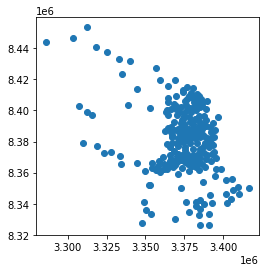

In [375]:
postcodes_spb_shape['centroid_column'] = postcodes_spb_shape.centroid
spb_post = postcodes_spb_shape.set_geometry('centroid_column')
spb_post.plot()

In [376]:
pst = postcodes_spb_shape.copy()
pst = pst.to_crs(4326)
pst['centroid_column'] = pst.centroid
pst['lon'] = pst.centroid_column.x
pst['lat'] = pst.centroid_column.y
pst.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  This is separate from the ipykernel package so we can avoid doing imports until


,OID_,OPSNAME,OPSTYPE,OPSSUBM,REGION,AUTONOM,AREA,CITY,CITY_1,ACTDATE,INDEXOLD,INDEX,geometry,centroid_column,lon,lat
0,9072,САНКТ-ПЕТЕРБУРГ 298,О,197000,САНКТ-ПЕТЕРБУРГ,None,None,None,None,2010-12-03,None,195298,"MULTIPOLYGON (((30.50494 59.95607, 30.50853 59...",POINT (30.49693 59.94371),30.496931,59.943710
1,9115,АЛЕКСАНДРОВСКАЯ,О,198999,САНКТ-ПЕТЕРБУРГ,None,None,АЛЕКСАНДРОВСКАЯ,None,2010-08-12,None,196631,"POLYGON ((30.32648 59.72436, 30.32129 59.72519...",POINT (30.33029 59.73456),30.330294,59.734565
2,9051,САНКТ-ПЕТЕРБУРГ 197,О,197000,САНКТ-ПЕТЕРБУРГ,None,None,None,None,2010-12-03,None,195197,"POLYGON ((30.35674 59.98483, 30.35991 59.98515...",POINT (30.37945 59.97650),30.379453,59.976504
3,9136,САНКТ-ПЕТЕРБУРГ 22,О,197000,САНКТ-ПЕТЕРБУРГ,None,None,None,None,2000-10-30,None,197022,"MULTIPOLYGON (((30.32124 59.97480, 30.32451 59...",POINT (30.30305 59.97348),30.303052,59.973482
4,9141,САНКТ-ПЕТЕРБУРГ 110,О,197000,САНКТ-ПЕТЕРБУРГ,None,None,None,None,2000-10-30,None,197110,"MULTIPOLYGON (((30.29426 59.96619, 30.29426 59...",POINT (30.25809 59.96916),30.258086,59.969165


In [377]:
pst.dtypes

OID_                  int64
OPSNAME              object
OPSTYPE              object
OPSSUBM              object
REGION               object
AUTONOM              object
AREA                 object
CITY                 object
CITY_1               object
ACTDATE              object
INDEXOLD             object
INDEX                 int64
geometry           geometry
centroid_column    geometry
lon                 float64
lat                 float64
dtype: object

# Full Distance Matrix


In [378]:
#Import another full data with the information of shops ever existed in the entry data dataset 
path2 = '/shops_info.csv'
shops_info = pd.read_csv(path_final +  path2)
shops_info.head()

,postcode,shopid,name_rus,name_trans,region,city,filid,firmid,house,housepurpose,post,street,lon,lat,chain,post_diff,big_chain
0,195298,10500,"Рогалик, кулинария","Rogalik, kulinarija",Saint Petersburg,Санкт-Петербург,59577,1215952529,24а,Административное здание,195298.0,Косыгина проспект,30.481685,59.945851,non-chain,False,NaN
1,195298,12167,"О`КЕЙ, сеть гипермаркетов","O`KEJ, set' gipermarketov",Saint Petersburg,Санкт-Петербург,40870,53452,12 к1,Супермаркет,195298.0,Ленская,30.494465,59.940564,chain,False,OKEY
2,195298,10503,"Альбатрос, ЗАО, продуктовый магазин","Al'batros, ZAO, produktovyj magazin",Saint Petersburg,Санкт-Петербург,7123,1492,26 к1,Жилой дом с административными помещениями,195298.0,Косыгина проспект,30.486455,59.945652,non-chain,False,NaN
3,195197,13270,"Луна, ООО, мини-маркет","Luna, OOO, mini-market",Saint Petersburg,Санкт-Петербург,10622,489413,14,Жилой дом с административными помещениями,195197.0,Маршала Блюхера проспект,30.380855,59.980434,non-chain,False,NaN
4,195197,13820,Продуктовый магазин,Produktovyj magazin,Saint Petersburg,Санкт-Петербург,52582,1216725968,116 лит А,Жилой дом с административными помещениями,195197.0,Металлистов проспект,30.393959,59.972234,non-chain,False,NaN


In [379]:
#Calculate a full dataset distance info 

pst[['lat_radians_A','long_radians_A']] = (
    np.radians(pst.loc[:,['lat','lon']])
)
shops_info[['lat_radians_B','long_radians_B']] = (
    np.radians(shops_info.loc[:,['lat','lon']])
)
pst.head()

,OID_,OPSNAME,OPSTYPE,OPSSUBM,REGION,AUTONOM,AREA,CITY,CITY_1,ACTDATE,INDEXOLD,INDEX,geometry,centroid_column,lon,lat,lat_radians_A,long_radians_A
0,9072,САНКТ-ПЕТЕРБУРГ 298,О,197000,САНКТ-ПЕТЕРБУРГ,None,None,None,None,2010-12-03,None,195298,"MULTIPOLYGON (((30.50494 59.95607, 30.50853 59...",POINT (30.49693 59.94371),30.496931,59.943710,1.046215,0.532272
1,9115,АЛЕКСАНДРОВСКАЯ,О,198999,САНКТ-ПЕТЕРБУРГ,None,None,АЛЕКСАНДРОВСКАЯ,None,2010-08-12,None,196631,"POLYGON ((30.32648 59.72436, 30.32129 59.72519...",POINT (30.33029 59.73456),30.330294,59.734565,1.042565,0.529363
2,9051,САНКТ-ПЕТЕРБУРГ 197,О,197000,САНКТ-ПЕТЕРБУРГ,None,None,None,None,2010-12-03,None,195197,"POLYGON ((30.35674 59.98483, 30.35991 59.98515...",POINT (30.37945 59.97650),30.379453,59.976504,1.046787,0.530221
3,9136,САНКТ-ПЕТЕРБУРГ 22,О,197000,САНКТ-ПЕТЕРБУРГ,None,None,None,None,2000-10-30,None,197022,"MULTIPOLYGON (((30.32124 59.97480, 30.32451 59...",POINT (30.30305 59.97348),30.303052,59.973482,1.046735,0.528888
4,9141,САНКТ-ПЕТЕРБУРГ 110,О,197000,САНКТ-ПЕТЕРБУРГ,None,None,None,None,2000-10-30,None,197110,"MULTIPOLYGON (((30.29426 59.96619, 30.29426 59...",POINT (30.25809 59.96916),30.258086,59.969165,1.046659,0.528103


In [380]:
shops_info.shape

(24678, 19)

In [381]:
#let's move on to the distances 
#source: https://medium.com/@danalindquist/finding-the-distance-between-two-lists-of-geographic-coordinates-9ace7e43bb2f
import sklearn.neighbors
dist = sklearn.neighbors.DistanceMetric.get_metric('haversine')
dist_matrix = (dist.pairwise
    (pst[['lat_radians_A','long_radians_A']],
     shops_info[['lat_radians_B','long_radians_B']])*6371
)



/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_distance_metric.py:14: FutureWarning: sklearn.neighbors.DistanceMetric has been moved to sklearn.metrics.DistanceMetric in 1.0. This import path will be removed in 1.3
  category=FutureWarning,


In [382]:
df_dist_matrix = (
    pd.DataFrame(dist_matrix,index=pst['INDEX'], 
                 columns=shops_info['shopid'])
)

In [383]:
df_dist_matrix

shopid,10500,12167,10503,13270,13820,10017,9020,18100,14640,4621,...,12324,20617,4233,2120,7415,2186,16534,8350,2853,5130
INDEX,,,,,,,,,,,,,,,,,,,,,
195298,0.881788,0.375752,0.622049,7.643236,6.551205,6.799435,10.805010,10.503295,10.642889,11.475559,...,20.389992,17.316001,13.120092,37.338977,12.641777,40.503645,30.307844,17.144241,28.386995,18.323658
196631,24.969901,24.674259,25.040654,27.484852,26.665657,26.041326,26.047911,26.235821,25.971983,25.271730,...,8.552603,14.238729,14.511323,17.245103,12.734769,16.005810,54.744333,37.465555,16.045891,39.871674
195197,6.633197,7.547233,6.873405,0.443945,0.936427,1.068097,4.001212,3.598265,3.872236,5.066750,...,24.567849,15.557253,12.810969,36.065977,14.474318,41.164851,28.048011,10.996806,25.873025,13.002468
197022,10.407495,11.267014,10.667935,4.397148,5.060243,4.567419,0.646663,0.795214,0.790732,1.470899,...,25.509090,13.637961,12.107592,33.637452,14.773796,39.672228,29.983936,10.961525,23.023455,13.609845
197110,12.714583,13.538796,12.979169,6.944844,7.568581,7.019674,2.851332,3.222764,3.002978,2.179192,...,26.123061,12.759601,12.112652,32.129030,15.254548,38.709323,31.582283,11.958135,21.319148,14.811299
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195160,4.396382,5.261899,4.657065,2.913178,1.772885,1.632972,5.533686,5.225745,5.372731,6.273636,...,22.208673,14.643866,11.318125,35.193141,12.450416,39.703324,29.642586,13.465201,25.386105,15.300366
196006,11.089280,11.339452,11.289479,11.014195,10.401103,9.679498,9.244789,9.423599,9.164173,8.537579,...,16.260556,5.678755,2.306022,26.046022,5.413060,30.595889,38.619501,20.656122,16.742194,23.113079
198099,14.877571,15.331734,15.114992,12.542394,12.372676,11.590950,9.223950,9.572974,9.229982,8.102484,...,19.969272,4.430167,5.822730,24.098016,9.682349,30.298907,39.546243,20.306279,13.712551,23.085152


In [384]:
#long format
df_dist_long = (
    pd.melt(df_dist_matrix.reset_index(),id_vars='INDEX')
)
df_dist_long = df_dist_long.rename(columns={'value':'km'})


In [385]:
df_dist_long

,INDEX,shopid,km
0,195298,10500,0.881788
1,196631,10500,24.969901
2,195197,10500,6.633197
3,197022,10500,10.407495
4,197110,10500,12.714583
...,...,...,...
6095461,195160,5130,15.300366
6095462,196006,5130,23.113079
6095463,198099,5130,23.085152
6095464,199026,5130,19.874458


In [386]:
#df_dist_long.write_csv('distances.csv')


In [387]:
# path3 = 'distances.csv'
# d = pd.read_csv( path_f path3
#                 )
# d.shape

# OFD distances matrix

In [388]:
shops_info.head()

,postcode,shopid,name_rus,name_trans,region,city,filid,firmid,house,housepurpose,post,street,lon,lat,chain,post_diff,big_chain,lat_radians_B,long_radians_B
0,195298,10500,"Рогалик, кулинария","Rogalik, kulinarija",Saint Petersburg,Санкт-Петербург,59577,1215952529,24а,Административное здание,195298.0,Косыгина проспект,30.481685,59.945851,non-chain,False,NaN,1.046252,0.532006
1,195298,12167,"О`КЕЙ, сеть гипермаркетов","O`KEJ, set' gipermarketov",Saint Petersburg,Санкт-Петербург,40870,53452,12 к1,Супермаркет,195298.0,Ленская,30.494465,59.940564,chain,False,OKEY,1.046160,0.532229
2,195298,10503,"Альбатрос, ЗАО, продуктовый магазин","Al'batros, ZAO, produktovyj magazin",Saint Petersburg,Санкт-Петербург,7123,1492,26 к1,Жилой дом с административными помещениями,195298.0,Косыгина проспект,30.486455,59.945652,non-chain,False,NaN,1.046249,0.532089
3,195197,13270,"Луна, ООО, мини-маркет","Luna, OOO, mini-market",Saint Petersburg,Санкт-Петербург,10622,489413,14,Жилой дом с административными помещениями,195197.0,Маршала Блюхера проспект,30.380855,59.980434,non-chain,False,NaN,1.046856,0.530246
4,195197,13820,Продуктовый магазин,Produktovyj magazin,Saint Petersburg,Санкт-Петербург,52582,1216725968,116 лит А,Жилой дом с административными помещениями,195197.0,Металлистов проспект,30.393959,59.972234,non-chain,False,NaN,1.046713,0.530475


In [389]:
#Join shops_info and OFD dataset to restrict the sample
path_OFD = '/OFD.csv'
OFD_data = pd.read_csv(path_final + path_OFD)
OFD_data.head()

,postcode,category,shoptype,ttl_traffic,avg_traffic,avg_check,id,region,sales,sales_avg,sales_share
0,192212,Ultra fresh,Supermarkets,3202488,18195.955103,179.676298,15732,Saint Petersburg,5.754112e+08,3.269382e+06,14.911578
1,192212,Fresh,"Discounters, convenience stores",19383290,765.191505,213.716801,15738,Saint Petersburg,4.142535e+09,1.635343e+05,78.906682
2,192212,Fresh,Supermarkets,5459280,9428.806189,202.843877,15744,Saint Petersburg,1.107382e+09,1.912576e+06,21.093318
3,192212,Other foods,"Discounters, convenience stores",12522135,908.652414,130.665501,15750,Saint Petersburg,1.636211e+09,1.187295e+05,80.936396
4,192212,Other foods,Supermarkets,3114213,11449.312668,123.751978,15809,Saint Petersburg,3.853900e+08,1.416875e+06,19.063604


In [390]:
ndata = pd.merge(OFD_data, shops_info, left_on=  ['id'],
                   right_on= ['shopid'], 
                   how = 'inner')



In [391]:
pst[['lat_radians_A','long_radians_A']] = (
    np.radians(pst.loc[:,['lat','lon']])
)
ndata[['lat_radians_B','long_radians_B']] = (
    np.radians(ndata.loc[:,['lat','lon']])
)

In [392]:
import sklearn.neighbors
dist = sklearn.neighbors.DistanceMetric.get_metric('haversine')
dist_matrix = (dist.pairwise
    (pst[['lat_radians_A','long_radians_A']],
     ndata[['lat_radians_B','long_radians_B']])*6371
)



/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_distance_metric.py:14: FutureWarning: sklearn.neighbors.DistanceMetric has been moved to sklearn.metrics.DistanceMetric in 1.0. This import path will be removed in 1.3
  category=FutureWarning,


In [393]:
df_dist_matrix_short = (
    pd.DataFrame(dist_matrix,index=pst['INDEX'], 
                 columns=ndata['shopid'])
)
df_dist_matrix_short

shopid,15732,15738,15744,15750,15809,15878,15938,15984,15988,15992,...,24667,24668,24669,24670,24671,24672,24673,24674,24675,24676
INDEX,,,,,,,,,,,,,,,,,,,,,
195298,16.790913,16.507748,16.485157,16.507979,14.019219,9.774711,4.946260,4.991479,4.852120,4.822021,...,5.943603,6.021300,6.100168,6.100168,5.125011,5.718186,5.718186,7.013169,7.013169,6.767290
196631,8.340295,8.661429,8.667776,8.674055,14.193433,28.970393,22.188887,21.632762,21.555147,21.555575,...,29.035890,29.076853,29.203461,29.203461,27.519607,28.779956,28.779956,27.676735,27.676735,27.289309
195197,18.863003,18.511528,18.523334,18.486860,13.412049,2.480092,5.513472,6.158068,6.359046,6.381464,...,12.441940,12.521913,12.550896,12.550896,12.167340,12.294073,12.294073,14.233553,14.233553,14.049961
197022,18.884942,18.520515,18.550924,18.483587,12.438855,3.698125,7.798597,8.344320,8.599820,8.635328,...,16.611562,16.692136,16.728590,16.728590,16.220103,16.449970,16.449970,18.236642,18.236642,18.020923
197110,19.077606,18.714442,18.755154,18.671145,12.253397,6.052391,9.654165,10.120590,10.380242,10.418663,...,19.065680,19.146471,19.187537,19.187537,18.608395,18.896039,18.896039,20.590413,20.590413,20.357919
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195160,16.869787,16.528951,16.532899,16.509746,12.036392,5.064144,3.105099,3.739287,3.908176,3.924921,...,10.779640,10.860522,10.910260,10.910260,10.262420,10.596954,10.596954,12.247087,12.247087,12.021604
196006,9.136365,8.772075,8.809790,8.730762,2.839878,12.254802,6.998257,6.736288,6.829290,6.854937,...,17.391180,17.462426,17.560304,17.560304,16.232315,17.141742,17.141742,17.567354,17.567354,17.209234
198099,12.274392,11.941820,12.004299,11.886532,5.374562,12.980218,10.639813,10.618277,10.791335,10.826060,...,21.506646,21.582685,21.667588,21.667588,20.502897,21.271903,21.271903,22.033822,22.033822,21.696590


In [394]:
#long format
df_dist_short = (
    pd.melt(df_dist_matrix_short.reset_index(),id_vars='INDEX')
)
df_dist_short = df_dist_short.rename(columns={'value':'km'})

df_dist_short.shape

(316160, 3)

In [395]:
#df_dist_short.to_csv('distances_short_OFD.csv')


In [396]:
postcodes_spb_shape.head()

,OID_,OPSNAME,OPSTYPE,OPSSUBM,REGION,AUTONOM,AREA,CITY,CITY_1,ACTDATE,INDEXOLD,INDEX,geometry,centroid_column
0,9072,САНКТ-ПЕТЕРБУРГ 298,О,197000,САНКТ-ПЕТЕРБУРГ,None,None,None,None,2010-12-03,None,195298,"MULTIPOLYGON (((3395793.923 8389963.270, 33961...",POINT (3394902.797 8387216.425)
1,9115,АЛЕКСАНДРОВСКАЯ,О,198999,САНКТ-ПЕТЕРБУРГ,None,None,АЛЕКСАНДРОВСКАЯ,None,2010-08-12,None,196631,"POLYGON ((3375928.200 8338623.279, 3375350.349...",POINT (3376352.728 8340877.567)
2,9051,САНКТ-ПЕТЕРБУРГ 197,О,197000,САНКТ-ПЕТЕРБУРГ,None,None,None,None,2010-12-03,None,195197,"POLYGON ((3379296.621 8396360.208, 3379650.181...",POINT (3381825.137 8394509.177)
3,9136,САНКТ-ПЕТЕРБУРГ 22,О,197000,САНКТ-ПЕТЕРБУРГ,None,None,None,None,2000-10-30,None,197022,"MULTIPOLYGON (((3375345.001 8394130.582, 33757...",POINT (3373320.223 8393836.583)
4,9141,САНКТ-ПЕТЕРБУРГ 110,О,197000,САНКТ-ПЕТЕРБУРГ,None,None,None,None,2000-10-30,None,197110,"MULTIPOLYGON (((3372341.897 8392214.428, 33723...",POINT (3368314.446 8392876.541)


In [397]:
postcodes_spb_shape["buffered_centroid"] = postcodes_spb_shape["centroid_column"].buffer(4000)


/usr/local/lib/python3.7/dist-packages/geopandas/geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


(3270204.2295796215, 3428331.371574669, 8313615.119626314, 8464413.791034803)

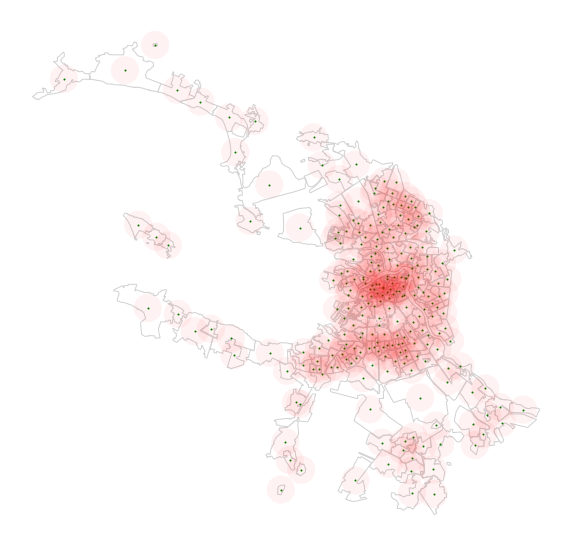

In [398]:
#исходя из данного графика можно понять, что одинаковый радиус невозможно применить ко всем индексам города
fig, ax = plt.subplots(1, 1, figsize = (10, 10))

postcodes_spb_shape.plot(color = 'white', edgecolor = 'lightgrey', ax = ax)
postcodes_spb_shape.centroid_column.plot(ax=ax, markersize = 1, color = 'green')
postcodes_spb_shape.buffered_centroid.plot(ax = ax, alpha = 0.05, color = 'red')


ax.axis('off')

In [399]:
postcodes_spb_shape.head()

,OID_,OPSNAME,OPSTYPE,OPSSUBM,REGION,AUTONOM,AREA,CITY,CITY_1,ACTDATE,INDEXOLD,INDEX,geometry,centroid_column,buffered_centroid
0,9072,САНКТ-ПЕТЕРБУРГ 298,О,197000,САНКТ-ПЕТЕРБУРГ,None,None,None,None,2010-12-03,None,195298,"MULTIPOLYGON (((3395793.923 8389963.270, 33961...",POINT (3394902.797 8387216.425),"POLYGON ((3398902.797 8387216.425, 3398883.535..."
1,9115,АЛЕКСАНДРОВСКАЯ,О,198999,САНКТ-ПЕТЕРБУРГ,None,None,АЛЕКСАНДРОВСКАЯ,None,2010-08-12,None,196631,"POLYGON ((3375928.200 8338623.279, 3375350.349...",POINT (3376352.728 8340877.567),"POLYGON ((3380352.728 8340877.567, 3380333.467..."
2,9051,САНКТ-ПЕТЕРБУРГ 197,О,197000,САНКТ-ПЕТЕРБУРГ,None,None,None,None,2010-12-03,None,195197,"POLYGON ((3379296.621 8396360.208, 3379650.181...",POINT (3381825.137 8394509.177),"POLYGON ((3385825.137 8394509.177, 3385805.876..."
3,9136,САНКТ-ПЕТЕРБУРГ 22,О,197000,САНКТ-ПЕТЕРБУРГ,None,None,None,None,2000-10-30,None,197022,"MULTIPOLYGON (((3375345.001 8394130.582, 33757...",POINT (3373320.223 8393836.583),"POLYGON ((3377320.223 8393836.583, 3377300.962..."
4,9141,САНКТ-ПЕТЕРБУРГ 110,О,197000,САНКТ-ПЕТЕРБУРГ,None,None,None,None,2000-10-30,None,197110,"MULTIPOLYGON (((3372341.897 8392214.428, 33723...",POINT (3368314.446 8392876.541),"POLYGON ((3372314.446 8392876.541, 3372295.185..."


# Entry data + OFD data

In [400]:
#entry dataset check
from shapely.geometry import Point, Polygon
!pip install geopandas
import geopandas as gpd
path_entry = '/entry_long.csv'
geo_entry_long = pd.read_csv(path_final + path_entry)

In [401]:
geo_entry_long['geometry'] = geo_entry_long.apply(lambda row: Point(row.lon, row.lat), axis=1)

/usr/local/lib/python3.7/dist-packages/pandas/core/dtypes/cast.py:118: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


In [402]:
geo_entry_long = gpd.GeoDataFrame(geo_entry_long, crs = 'EPSG:4326', geometry = geo_entry_long.geometry)

In [403]:
geo_entry_long = geo_entry_long.to_crs(3857)

geo_entry_long.head()

,shopid,period,shop,shop_cumsum,shop_cumsum_last,shop_disappear,shop_full,shop_lag,shop_entry,shop_exit,...,house,housepurpose,post,street,lon,lat,chain,post_diff,big_chain,geometry
0,-1,2017-01-01,0.0,0.0,1.0,0,0.0,NaN,0,0,...,NaN,NaN,198320.0,NaN,30.086049,59.747935,non-chain,False,NaN,POINT (3349163.708 8343831.046)
1,-1,2017-06-01,0.0,0.0,1.0,0,0.0,0.0,0,0,...,NaN,NaN,198320.0,NaN,30.086049,59.747935,non-chain,False,NaN,POINT (3349163.708 8343831.046)
2,-1,2018-01-01,0.0,0.0,1.0,0,0.0,0.0,0,0,...,NaN,NaN,198320.0,NaN,30.086049,59.747935,non-chain,False,NaN,POINT (3349163.708 8343831.046)
3,-1,2018-07-01,0.0,0.0,1.0,0,0.0,0.0,0,0,...,NaN,NaN,198320.0,NaN,30.086049,59.747935,non-chain,False,NaN,POINT (3349163.708 8343831.046)
4,-1,2019-04-01,1.0,1.0,1.0,0,1.0,0.0,1,0,...,NaN,NaN,198320.0,NaN,30.086049,59.747935,non-chain,False,NaN,POINT (3349163.708 8343831.046)


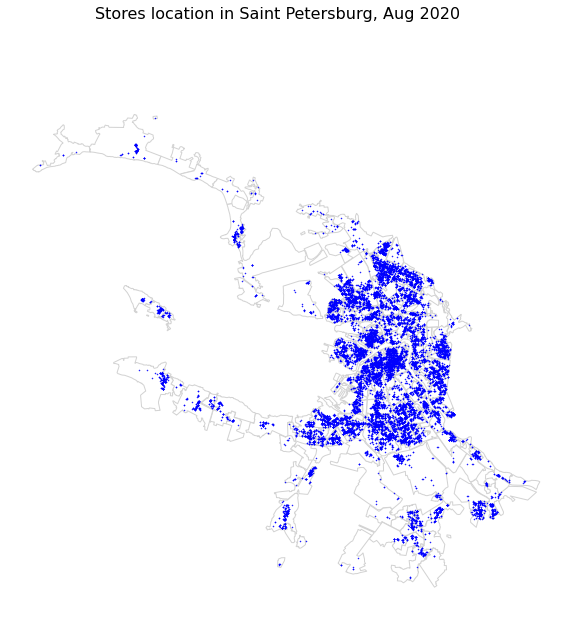

In [404]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1, figsize = (10, 10))

postcodes_spb_shape.plot(color = 'white', edgecolor = 'lightgrey', ax = ax)

geo_entry_long.loc[(geo_entry_long['postcode'] >= 190000) & (geo_entry_long['period'] == '2019-09-01')].plot(ax = ax, marker = 'o', color = 'blue', markersize = 0.25)

ax.axis('off')

fig.suptitle('Stores location in Saint Petersburg, Aug 2020', fontsize=16)
plt.show()

In [405]:
entry_2019 = geo_entry_long.loc[(geo_entry_long['postcode'] >= 190000) & (geo_entry_long['period'] == '2019-09-01')& (geo_entry_long.shop == 1)]

In [406]:
entry_mg = pd.merge(OFD_data, entry_2019, left_on=  ['id'],
                   right_on= ['shopid'], 
                   how = 'inner')


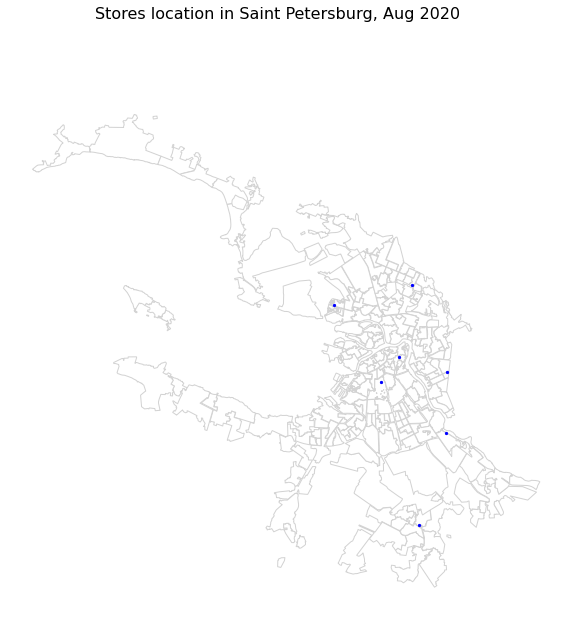

In [411]:
#find hypermarkets in 2019 consistent with the OFD and location layer 
hypers_2019 = entry_mg[(entry_mg.shoptype == 'Hypermarkets') & (entry_mg.category == 'All')]

geo_entry_long = geo_entry_long.assign(InDf2=geo_entry_long.shopid.isin(hypers_2019.shopid).astype(int))
  
inadequate = geo_entry_long.loc[(geo_entry_long.InDf2>0) & (geo_entry_long.shop == 1) & (geo_entry_long['period'] == '2019-09-01')]

import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1, figsize = (10, 10))

postcodes_spb_shape.plot(color = 'white', edgecolor = 'lightgrey', ax = ax)

inadequate.plot(ax = ax, marker = 'o', color = 'blue', markersize = 5)

ax.axis('off')

fig.suptitle('Stores location in Saint Petersburg, Aug 2020', fontsize=16)
plt.show()




In [412]:
info_entry  = pd.merge(shops_info, entry_2019, left_on=  ['shopid'],
                   right_on= ['shopid'], 
                   how = 'inner')

In [413]:
bc_entry2019 = entry_2019.loc[~entry_2019.big_chain.isna()]


# Smth about the Huff


In [414]:
mobile_data = pd.read_csv(path_final + '/smartphones.csv')
mobile_data_19 = mobile_data[(mobile_data.period == '2019-10-01') & (mobile_data.postcode >=190000)]
mobile_data_19.shape

(247, 4)

In [415]:
pst2 = pst.to_crs(3857)
pst2['area_obj'] = pst2.area
pst2['hex_quan'] = round(pst2['area_obj']/(3*np.sqrt(3)/2* 100**2))



In [416]:
merged_area = pd.merge(mobile_data_19, pst2, left_on=  ['postcode'],
                   right_on= ['INDEX'], 
                   how = 'inner')

merged_area.drop(columns = ['centroid_column', 'lon', 'lat', 'lat_radians_A','long_radians_A'], inplace = True)

In [417]:
merged_area['device_index'] = merged_area['devices'] * merged_area['hex_quan']
merged_area.head(2)

,postcode,period,region,devices,OID_,OPSNAME,OPSTYPE,OPSSUBM,REGION,AUTONOM,AREA,CITY,CITY_1,ACTDATE,INDEXOLD,INDEX,geometry,area_obj,hex_quan,device_index
0,190000,2019-10-01,Saint Petersburg,389,8835,САНКТ-ПЕТЕРБУРГ,О,190999,САНКТ-ПЕТЕРБУРГ,None,None,None,None,2010-01-19,None,190000,"MULTIPOLYGON (((3373192.126 8385410.244, 33734...",5.111813e+06,197.0,76633.0
1,190005,2019-10-01,Saint Petersburg,282,8836,САНКТ-ПЕТЕРБУРГ 5,О,190999,САНКТ-ПЕТЕРБУРГ,None,None,None,None,2002-12-26,None,190005,"POLYGON ((3374975.723 8381095.519, 3374979.692...",6.691916e+06,258.0,72756.0


In [418]:
merged_area.sort_values(by = ['INDEX'], inplace = True)
pst2.sort_values(by = ['INDEX'], inplace = True)
pst2['device_index'] = merged_area.device_index

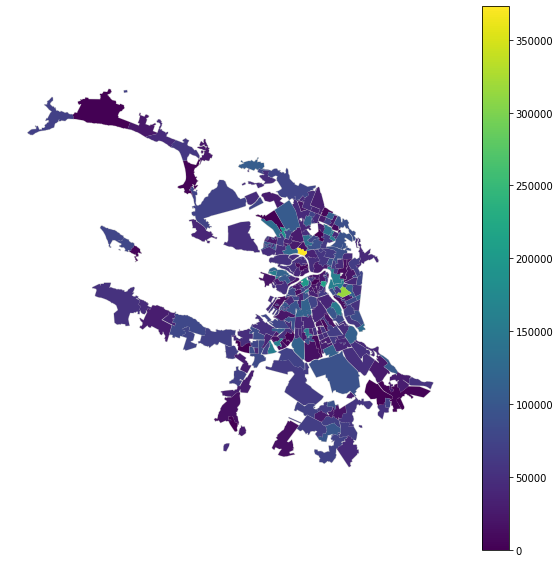

In [419]:
fig, ax = plt.subplots(1, 1, figsize = (10, 10))


pst2.plot(color = 'white', edgecolor = 'lightgrey', ax = ax)
pst2.plot(column = 'device_index', legend = True,  ax = ax)

ax.axis('off')
plt.show()

In [420]:
OFD_data

,postcode,category,shoptype,ttl_traffic,avg_traffic,avg_check,id,region,sales,sales_avg,sales_share
0,192212,Ultra fresh,Supermarkets,3202488,18195.955103,179.676298,15732,Saint Petersburg,5.754112e+08,3.269382e+06,14.911578
1,192212,Fresh,"Discounters, convenience stores",19383290,765.191505,213.716801,15738,Saint Petersburg,4.142535e+09,1.635343e+05,78.906682
2,192212,Fresh,Supermarkets,5459280,9428.806189,202.843877,15744,Saint Petersburg,1.107382e+09,1.912576e+06,21.093318
3,192212,Other foods,"Discounters, convenience stores",12522135,908.652414,130.665501,15750,Saint Petersburg,1.636211e+09,1.187295e+05,80.936396
4,192212,Other foods,Supermarkets,3114213,11449.312668,123.751978,15809,Saint Petersburg,3.853900e+08,1.416875e+06,19.063604
...,...,...,...,...,...,...,...,...,...,...,...
8123,199406,Meat,"Discounters, convenience stores",2577342,201.244012,202.329139,31520,Saint Petersburg,5.214714e+08,4.071753e+04,100.000000
8124,199406,Alcohol,"Discounters, convenience stores",6406439,519.581490,417.348716,31521,Saint Petersburg,2.673719e+09,2.168467e+05,99.690473
8125,199406,Alcohol,Supermarkets,37755,2517.000000,219.880000,31522,Saint Petersburg,8.301569e+06,5.534380e+05,0.309527
8126,199406,Tobacco,"Discounters, convenience stores",5698562,600.987720,218.881873,31523,Saint Petersburg,1.247312e+09,1.315453e+05,100.000000


# Distance For Huff


In [421]:
pst[['lat_radians_A','long_radians_A']] = (
    np.radians(pst.loc[:,['lat','lon']])
)

inadequate[['lat_radians_B','long_radians_B']] = (
    np.radians(inadequate.loc[:,['lat','lon']])
)

/usr/local/lib/python3.7/dist-packages/geopandas/geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [422]:
import sklearn.neighbors
dist = sklearn.neighbors.DistanceMetric.get_metric('haversine')
dist_matrix = (dist.pairwise
    (pst[['lat_radians_A','long_radians_A']],
     inadequate[['lat_radians_B','long_radians_B']])*6371
)



/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_distance_metric.py:14: FutureWarning: sklearn.neighbors.DistanceMetric has been moved to sklearn.metrics.DistanceMetric in 1.0. This import path will be removed in 1.3
  category=FutureWarning,


In [423]:
df_dist_matrix_short = (
    pd.DataFrame(dist_matrix,index=pst['INDEX'], 
                 columns=inadequate['shopid'])
)
df_dist_matrix_short

shopid,17278,19882,19969,21723,22043,22875,22984
INDEX,,,,,,,
195298,2.900575,10.334766,6.864000,17.320547,10.678059,24.964955,11.588699
196631,22.388026,18.923494,22.560395,30.603673,32.962889,5.513107,14.831837
195197,9.261006,8.467846,4.486422,9.923093,5.979642,28.406780,16.516877
197022,12.462911,7.774066,5.746895,6.171263,8.410106,28.778415,18.308620
197110,14.491310,8.168126,7.449648,4.644565,10.580297,29.021598,19.514097
...,...,...,...,...,...,...,...
195160,6.729134,7.292150,2.951383,12.077922,7.893263,26.201701,14.004862
196006,10.336737,2.138032,6.310957,14.499242,16.549329,19.077853,10.840541
198099,14.823758,5.327920,9.053366,12.162844,17.709211,21.913409,15.675008


In [424]:
#long format
df_dist_hyper = (
    pd.melt(df_dist_matrix_short.reset_index(),id_vars='INDEX')
)
df_dist_hyper = df_dist_short.rename(columns={'value':'km'})

df_dist_hyper

,INDEX,shopid,km
0,195298,15732,16.790913
1,196631,15732,8.340295
2,195197,15732,18.863003
3,197022,15732,18.884942
4,197110,15732,19.077606
...,...,...,...
316155,195160,24676,12.021604
316156,196006,24676,17.209234
316157,198099,24676,21.696590
316158,199026,24676,20.728277


In [425]:
postcodes_spb_shape.head()

,OID_,OPSNAME,OPSTYPE,OPSSUBM,REGION,AUTONOM,AREA,CITY,CITY_1,ACTDATE,INDEXOLD,INDEX,geometry,centroid_column,buffered_centroid
0,9072,САНКТ-ПЕТЕРБУРГ 298,О,197000,САНКТ-ПЕТЕРБУРГ,None,None,None,None,2010-12-03,None,195298,"MULTIPOLYGON (((3395793.923 8389963.270, 33961...",POINT (3394902.797 8387216.425),"POLYGON ((3398902.797 8387216.425, 3398883.535..."
1,9115,АЛЕКСАНДРОВСКАЯ,О,198999,САНКТ-ПЕТЕРБУРГ,None,None,АЛЕКСАНДРОВСКАЯ,None,2010-08-12,None,196631,"POLYGON ((3375928.200 8338623.279, 3375350.349...",POINT (3376352.728 8340877.567),"POLYGON ((3380352.728 8340877.567, 3380333.467..."
2,9051,САНКТ-ПЕТЕРБУРГ 197,О,197000,САНКТ-ПЕТЕРБУРГ,None,None,None,None,2010-12-03,None,195197,"POLYGON ((3379296.621 8396360.208, 3379650.181...",POINT (3381825.137 8394509.177),"POLYGON ((3385825.137 8394509.177, 3385805.876..."
3,9136,САНКТ-ПЕТЕРБУРГ 22,О,197000,САНКТ-ПЕТЕРБУРГ,None,None,None,None,2000-10-30,None,197022,"MULTIPOLYGON (((3375345.001 8394130.582, 33757...",POINT (3373320.223 8393836.583),"POLYGON ((3377320.223 8393836.583, 3377300.962..."
4,9141,САНКТ-ПЕТЕРБУРГ 110,О,197000,САНКТ-ПЕТЕРБУРГ,None,None,None,None,2000-10-30,None,197110,"MULTIPOLYGON (((3372341.897 8392214.428, 33723...",POINT (3368314.446 8392876.541),"POLYGON ((3372314.446 8392876.541, 3372295.185..."


# Pre-Huff

In [426]:
#let's merge the selected hypermarkets and distances
attr_hyper = pd.merge(hypers_2019, df_dist_hyper, left_on=  ['shopid'],
                   right_on= ['shopid'], 
                   how = 'inner')
attr_hyper.INDEX

0       195298
1       196631
2       195197
3       197022
4       197110
         ...  
1724    195160
1725    196006
1726    198099
1727    199026
1728    199053
Name: INDEX, Length: 1729, dtype: int64

In [427]:
mx = pd.merge(attr_hyper, merged_area, left_on=  ['INDEX'],
                   right_on= ['INDEX'], 
                   how = 'inner')
mx.sales_share = mx['sales_share']/100


## Huff stuff

In [429]:
import sys
!{sys.executable} -m pip install pyswarms

In [430]:
# Import modules
import numpy as np

# Import PySwarms
#import pyswarms as ps
from pyswarms.utils.functions import single_obj as fx

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
#%load_ext autoreload
#%autoreload 2


In [432]:
#source: https://github.com/GeoDS/T-Huff

def HuffModel(mx,alpha,beta,att_field):
    #get the sum of H (dinominator)
    #print(alpha)
    #print(beta)
    cbg_sum = {}
    for i,row in mx.iterrows():
        if mx.loc[i]["INDEX"] not in cbg_sum.keys():
            A = mx.loc[i][att_field]
            D = mx.loc[i]["km"]
            cbg_sum[mx.loc[i]["INDEX"]] = HuffPro(A,D,alpha,beta)
        else:
            A = mx.loc[i][att_field]
            D = mx.loc[i]["km"]
            cbg_sum[mx.loc[i]["INDEX"]] += HuffPro(A,D,alpha,beta)
    mx["pro"] = ""
    mx["h_sum"] = ""
    for i,row in mx.iterrows():
        mx.loc[i,"h_sum"] = cbg_sum[mx.loc[i]["INDEX"]]
        A = mx.loc[i][att_field]
        D = mx.loc[i]["km"]
        mx.loc[i,"pro"] =  HuffPro(A,D,alpha,beta)/mx.loc[i]["h_sum"]
    return mx

def HuffPro(A,D,alpha,beta):
    return pow(A,alpha)/pow(D,beta)
#"Whole Foods Market"
def Corr(mx,alpha,beta,att_field,location_name):
    mx_hf = HuffModel(mx,alpha,beta,att_field)
    mx_hf["pro"] = mx_hf["pro"].astype(float)
    mx_hf["sales_share"] = mx_hf["sales_share"].astype(float)
    mx_hf_location = mx_hf[mx_hf["shoptype"] == location_name]
    cor = mx_hf_location[["sales_share","pro"]].corr().values[0][1]
    #cor_total = mx_hf[["actual_pro","pro"]].corr().values[0][1]
    return mx_hf, cor

alpha_list_ori_detailed = [0.1,0.5,1,2,5]
beta_list = [0.01,0.05,0.1]
result = {}
for alpha in alpha_list_ori_detailed:
    for beta in beta_list:
        att_field = "device_index"
        location_name = "Hypermarkets" 
        mx_hf,cor = Corr(mx,alpha,beta,att_field,location_name)
        result[alpha,beta] = cor
        print(alpha, ",",beta,": ",cor)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in double_scalars


0.1 , 0.01 :  0.08415235861323042
0.1 , 0.05 :  0.080922834818171
0.1 , 0.1 :  0.07689907732066614
0.5 , 0.01 :  0.08415235861323048
0.5 , 0.05 :  0.08092283481817104
0.5 , 0.1 :  0.07689907732066617
1 , 0.01 :  0.08415235861323024
1 , 0.05 :  0.08092283481817092
1 , 0.1 :  0.0768990773206661
2 , 0.01 :  0.08415235861322987
2 , 0.05 :  0.08092283481817099
2 , 0.1 :  0.07689907732066624
5 , 0.01 :  0.08415235861323052
5 , 0.05 :  0.08092283481817097
5 , 0.1 :  0.0768990773206662


In [ ]:
def PSOfunction_Huff(x): 
    print(x)
    import timeit
    #start_time = timeit.default_timer()
    alpha = x[:,0]
    beta = x[:,1]
    i = 0
    max_cor = -9999
    att_field = "device_index"
    location_name = "Hypermarkets"
    n_particles = x.shape[0]
    j = []
    for i in range(n_particles):
        mx_hf,cor = Corr(mx,alpha[i],beta[i],att_field,location_name)
        j.append(-cor)
    print(j)
    return np.array(j)

In [ ]:
# from pyswarms.single.global_best import GlobalBestPSO

# #using Whole Foods with 
# x_max = 0.5* np.ones(2)
# x_min = 0* np.ones(2)
# bounds = (x_min, x_max)
# print(bounds)
# options = {'c1': 2, 'c2': 2, 'w': 0.9}
# #init_pos = pos
# optimizer = GlobalBestPSO(n_particles=10, dimensions=2,options=options, bounds=bounds)

# #kwargs={"mx": mx}
# cost, pos = optimizer.optimize(PSOfunction_Huff, 10)

,postcode_x,ttl_traffic,avg_traffic,avg_check,id,sales,sales_avg,sales_share,shop,shop_cumsum,...,lat,post_diff,km,postcode,devices,OID_,area_obj,hex_quan,device_index,pro
INDEX,,,,,,,,,,,,,,,,,,,,,
190000,1345144,80224049,513850.433043,9023.107116,146754,6.995661e+10,5.762805e+08,0.98133,7.0,30.0,...,419.35167,2,79.324257,1330000,2723,61845,3.578269e+07,1379.0,536431.0,1.0
190005,1345144,80224049,513850.433043,9023.107116,146754,6.995661e+10,5.762805e+08,0.98133,7.0,30.0,...,419.35167,2,77.218588,1330035,1974,61852,4.684341e+07,1806.0,509292.0,1.0
190013,1345144,80224049,513850.433043,9023.107116,146754,6.995661e+10,5.762805e+08,0.98133,7.0,30.0,...,419.35167,2,74.254293,1330091,2653,61866,2.776626e+07,1071.0,405909.0,1.0
190020,1345144,80224049,513850.433043,9023.107116,146754,6.995661e+10,5.762805e+08,0.98133,7.0,30.0,...,419.35167,2,84.678127,1330140,1421,61873,4.364368e+07,1680.0,341040.0,1.0
190031,1345144,80224049,513850.433043,9023.107116,146754,6.995661e+10,5.762805e+08,0.98133,7.0,30.0,...,419.35167,2,76.084912,1330217,4235,61880,1.579294e+07,609.0,368445.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199155,1345144,80224049,513850.433043,9023.107116,146754,6.995661e+10,5.762805e+08,0.98133,7.0,30.0,...,419.35167,2,94.512457,1394085,1309,64673,7.284521e+07,2807.0,524909.0,1.0
199178,1345144,80224049,513850.433043,9023.107116,146754,6.995661e+10,5.762805e+08,0.98133,7.0,30.0,...,419.35167,2,88.946179,1394246,1848,64687,5.612533e+07,2163.0,571032.0,1.0
199226,1345144,80224049,513850.433043,9023.107116,146754,6.995661e+10,5.762805e+08,0.98133,7.0,30.0,...,419.35167,2,102.309762,1394582,756,64694,9.955182e+07,3829.0,413532.0,1.0


AttributeError: ignored

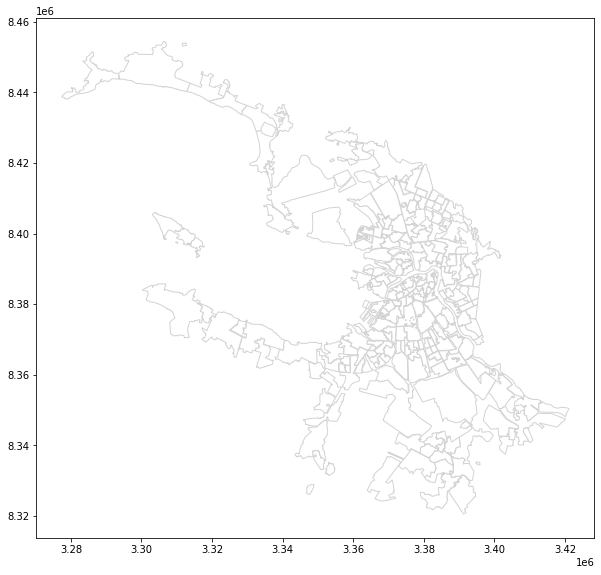

In [ ]:
fig, ax = plt.subplots(1, 1, figsize = (10, 10))
postcodes_spb_shape.plot(color = 'white', edgecolor = 'lightgrey', ax = ax)
mx.plot(column = 'pop', legend = True,  ax = ax)
ax.axis('off')
plt.show()